Predicting finally

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Dataset Preperation </h1>
</div>

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from plotnine import *
import pyarrow.feather as feather

In [32]:
# Load the Feather file into a DataFrame
car_df = feather.read_feather('processed_data.feather')

In [33]:
car_df.columns

Index(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice', 'brand_model',
       'car_age', 'mileage_per_year', 'market_price_deviation', 'brand_label',
       'trim_label', 'body_label', 'color_label', 'interior_label',
       'transmission_label'],
      dtype='object')

In [34]:
car_df.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,...,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
2,2014,Bmw,3 Series,Others,Sedan,Automatic,1.145277,-1.364964,Silver,Black,...,Bmw_3 Series,-1.021999,-2.023111,-1.773132,8,0,1,1,1,0
3,2015,Others,Others,Others,Sedan,Automatic,0.719401,-1.086219,White,Black,...,Volvo_S60,-1.311799,-0.107857,0.287817,0,0,1,3,1,0
4,2014,Bmw,Others,Others,Sedan,Automatic,0.932339,-1.336769,Silver,Black,...,Bmw_6 Series Gran Coupe,-1.311799,-0.107857,1.006753,8,0,1,1,1,0
6,2014,Bmw,Others,Base,Sedan,Automatic,-0.025882,-1.071992,Black,Black,...,Bmw_M5,-1.311799,-0.107857,0.000243,8,1,1,2,1,0
7,2014,Chevrolet,Others,Others,Sedan,Automatic,-1.516450,-0.777685,Black,Black,...,Chevrolet_Cruze,-1.311799,-0.107857,-1.964848,2,0,1,2,1,0


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Train, test, validation split</b></font></div>

In [35]:
X = car_df[['year', 'brand', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'brand_model',
       'car_age', 'mileage_per_year', 'market_price_deviation', 'brand_label',
       'trim_label', 'body_label', 'color_label', 'interior_label',
       'transmission_label']].copy()
y = car_df[['sellingprice']].copy()

In [44]:
# Split the original dataset into train and test sets (80-20 split)
from sklearn.model_selection import train_test_split

X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training-test set into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=77)

In [45]:
# Check the sizes or shapes of each set
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Print a few rows from each set to inspect the data
print("\nSample rows from Train set:")
print(X_train.head())
print(y_train.head())

print("\nSample rows from Validation set:")
print(X_val.head())
print(y_val.head())

print("\nSample rows from Test set:")
print(X_test.head())
print(y_test.head())


Train set shape: (357510, 20) (357510, 1)
Validation set shape: (89378, 20) (89378, 1)
Test set shape: (111722, 20) (111722, 1)

Sample rows from Train set:
        year    brand   model    trim   body transmission  condition  \
417744  2013     Ford  Others  Others    Suv    Automatic   1.571154   
294478  2012     Ford  Others     Xlt    Suv    Automatic   0.825870   
481987  2013  Hyundai  Others     Gls  Sedan    Automatic  -0.558228   
78199   2002   Nissan  Others      Se    Suv    Automatic  -2.581140   
20667   2006  Hyundai  Others      Lx  Sedan    Automatic   0.000215   

        odometer   color interior      brand_model   car_age  \
417744 -1.080730     Red    Black        Ford_Edge -0.732200   
294478 -0.373266  Silver    Black    Ford_Explorer -0.442400   
481987 -0.237305   White      Tan  Hyundai_Elantra -0.732200   
78199  -0.268589   Other   Silver    Nissan_Xterra  2.455598   
20667   2.516962   Other    Other   Hyundai_Sonata  1.006599   

        mileage_per_year 

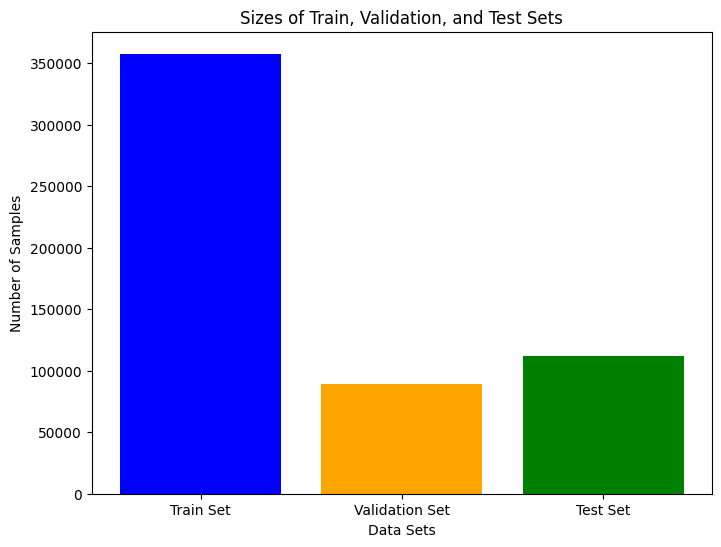

In [46]:
import matplotlib.pyplot as plt

# Data for plotting
sets = ['Train Set', 'Validation Set', 'Test Set']
sizes = [len(X_train), len(X_val), len(X_test)]

# Plotting the sizes of sets
plt.figure(figsize=(8, 6))
plt.bar(sets, sizes, color=['blue', 'orange', 'green'])
plt.xlabel('Data Sets')
plt.ylabel('Number of Samples')
plt.title('Sizes of Train, Validation, and Test Sets')
plt.show()

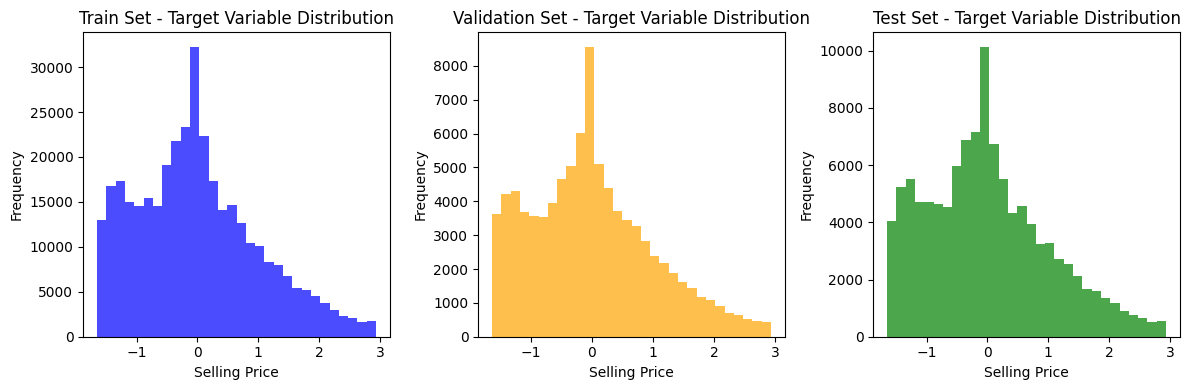

In [49]:
import matplotlib.pyplot as plt

# Plot histograms for the target variable in each set
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Train Set - Target Variable Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(y_val, bins=30, color='orange', alpha=0.7)
plt.title('Validation Set - Target Variable Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(y_test, bins=30, color='green', alpha=0.7)
plt.title('Test Set - Target Variable Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [53]:
X_train.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
417744,2013,Ford,Others,Others,Suv,Automatic,1.571154,-1.080730,Red,Black,Ford_Edge,-0.732200,-1.144580,-0.718693,1,0,2,4,1,0
294478,2012,Ford,Others,Xlt,Suv,Automatic,0.825870,-0.373266,Silver,Black,Ford_Explorer,-0.442400,0.118112,1.006753,1,6,2,1,1,0
481987,2013,Hyundai,Others,Gls,Sedan,Automatic,-0.558228,-0.237305,White,Tan,Hyundai_Elantra,-0.732200,1.754535,-0.455083,7,9,1,3,4,0
78199,2002,Nissan,Others,Se,Suv,Automatic,-2.581140,-0.268589,Other,Silver,Nissan_Xterra,2.455598,0.157706,-0.526976,3,2,2,0,2,0
20667,2006,Hyundai,Others,Lx,Sedan,Automatic,0.000215,2.516962,Other,Other,Hyundai_Sonata,1.006599,1.140414,-0.071650,7,3,1,0,0,0


In [50]:
X_test.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
243545,2010,Dodge,Grand Caravan,Se,Van,Automatic,-0.877635,0.425736,Silver,Beige,Dodge_Grand Caravan,0.137200,0.281414,-1.221948,5,2,4,1,3,0
94742,2002,Others,Others,Limited,Suv,Automatic,-1.622919,2.657616,Other,Silver,Jeep_Grand Cherokee,2.455598,-0.077692,0.072137,0,4,2,0,2,0
429004,2012,Nissan,Altima,Others,Sedan,Automatic,0.080587,-0.426105,Silver,Black,Nissan_Altima,-0.442400,-0.002971,-0.191473,3,0,1,1,1,0
223237,2012,Nissan,Altima,Others,Sedan,Automatic,1.145277,-1.067644,Other,Silver,Nissan_Altima,-0.442400,-1.473083,0.048172,3,0,1,0,2,0
46574,2006,Others,Others,Others,Sedan,Manual,-0.025882,-0.086084,Black,Tan,Audi_A4,1.006599,-1.096455,0.719179,0,0,1,2,4,1


In [51]:
X_val.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
327760,2009,Ford,Focus,S,Sedan,Automatic,0.293525,1.315823,Red,Beige,Ford_Focus,0.426999,0.884339,-0.359225,1,10,1,4,3,0
503370,2007,Toyota,Camry,Others,Sedan,Automatic,0.080587,0.759257,Black,Silver,Toyota_Camry,1.006599,-0.370030,-0.958338,4,0,1,2,2,0
116018,2008,Nissan,Others,Others,Suv,Automatic,-0.877635,0.734312,White,Black,Nissan_Rogue,0.716799,-0.130240,-0.119579,3,0,2,3,1,0
73529,2014,Others,Others,Others,Suv,Automatic,0.719401,-1.263849,Other,Black,Subaru_Xv Crosstrek,-1.021999,-1.327980,-0.431118,0,0,2,0,1,0
198543,2013,Nissan,Others,S,Suv,Automatic,0.825870,-0.141828,Silver,Silver,Nissan_Rogue,-0.732200,2.082717,0.335747,3,10,2,1,2,0


<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Fitting </h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Random Forest</b></font></div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>ANN</b></font></div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Evaluation </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Selection </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Explainability </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Bonus 1? </h1>
</div>